### Importing the Required Libraries

In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
at = pd.read_csv("F:\pandas\Attrition.csv")

#### Checking the nulls

In [3]:
at.isnull().sum()[at.isnull().sum()>0]

Series([], dtype: int64)

#### Checking the Datatype

In [4]:
at.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

#### Converting non-numeric data into numeric data

In [5]:
at.Attrition.replace({"Yes" : 1 , "No":0}, inplace = True)

at.Gender.replace({"Male" : 1 , "Female":0}, inplace = True)

at.Over18.replace({"Y" : 1}, inplace = True)

at.OverTime.replace({"Yes" : 1 , "No": 0}, inplace = True)


In [6]:
at.columns[at.dtypes=='object']

Index(['BusinessTravel', 'Department', 'EducationField', 'JobRole',
       'MaritalStatus'],
      dtype='object')

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
at[at.select_dtypes (include = "object").columns] = at[at.select_dtypes (include = "object").columns].apply(le.fit_transform)


In [8]:
at.columns[at.dtypes=='object']

Index([], dtype='object')

In [9]:
at.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2


In [10]:
first_column = at.pop('Attrition')
at.insert(0, 'Attrition', first_column)

In [11]:
at.head()

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,0,49,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,1,37,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,0,33,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,0,27,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2


In [12]:
import warnings 
warnings.filterwarnings("ignore")

### Visualizing the Data

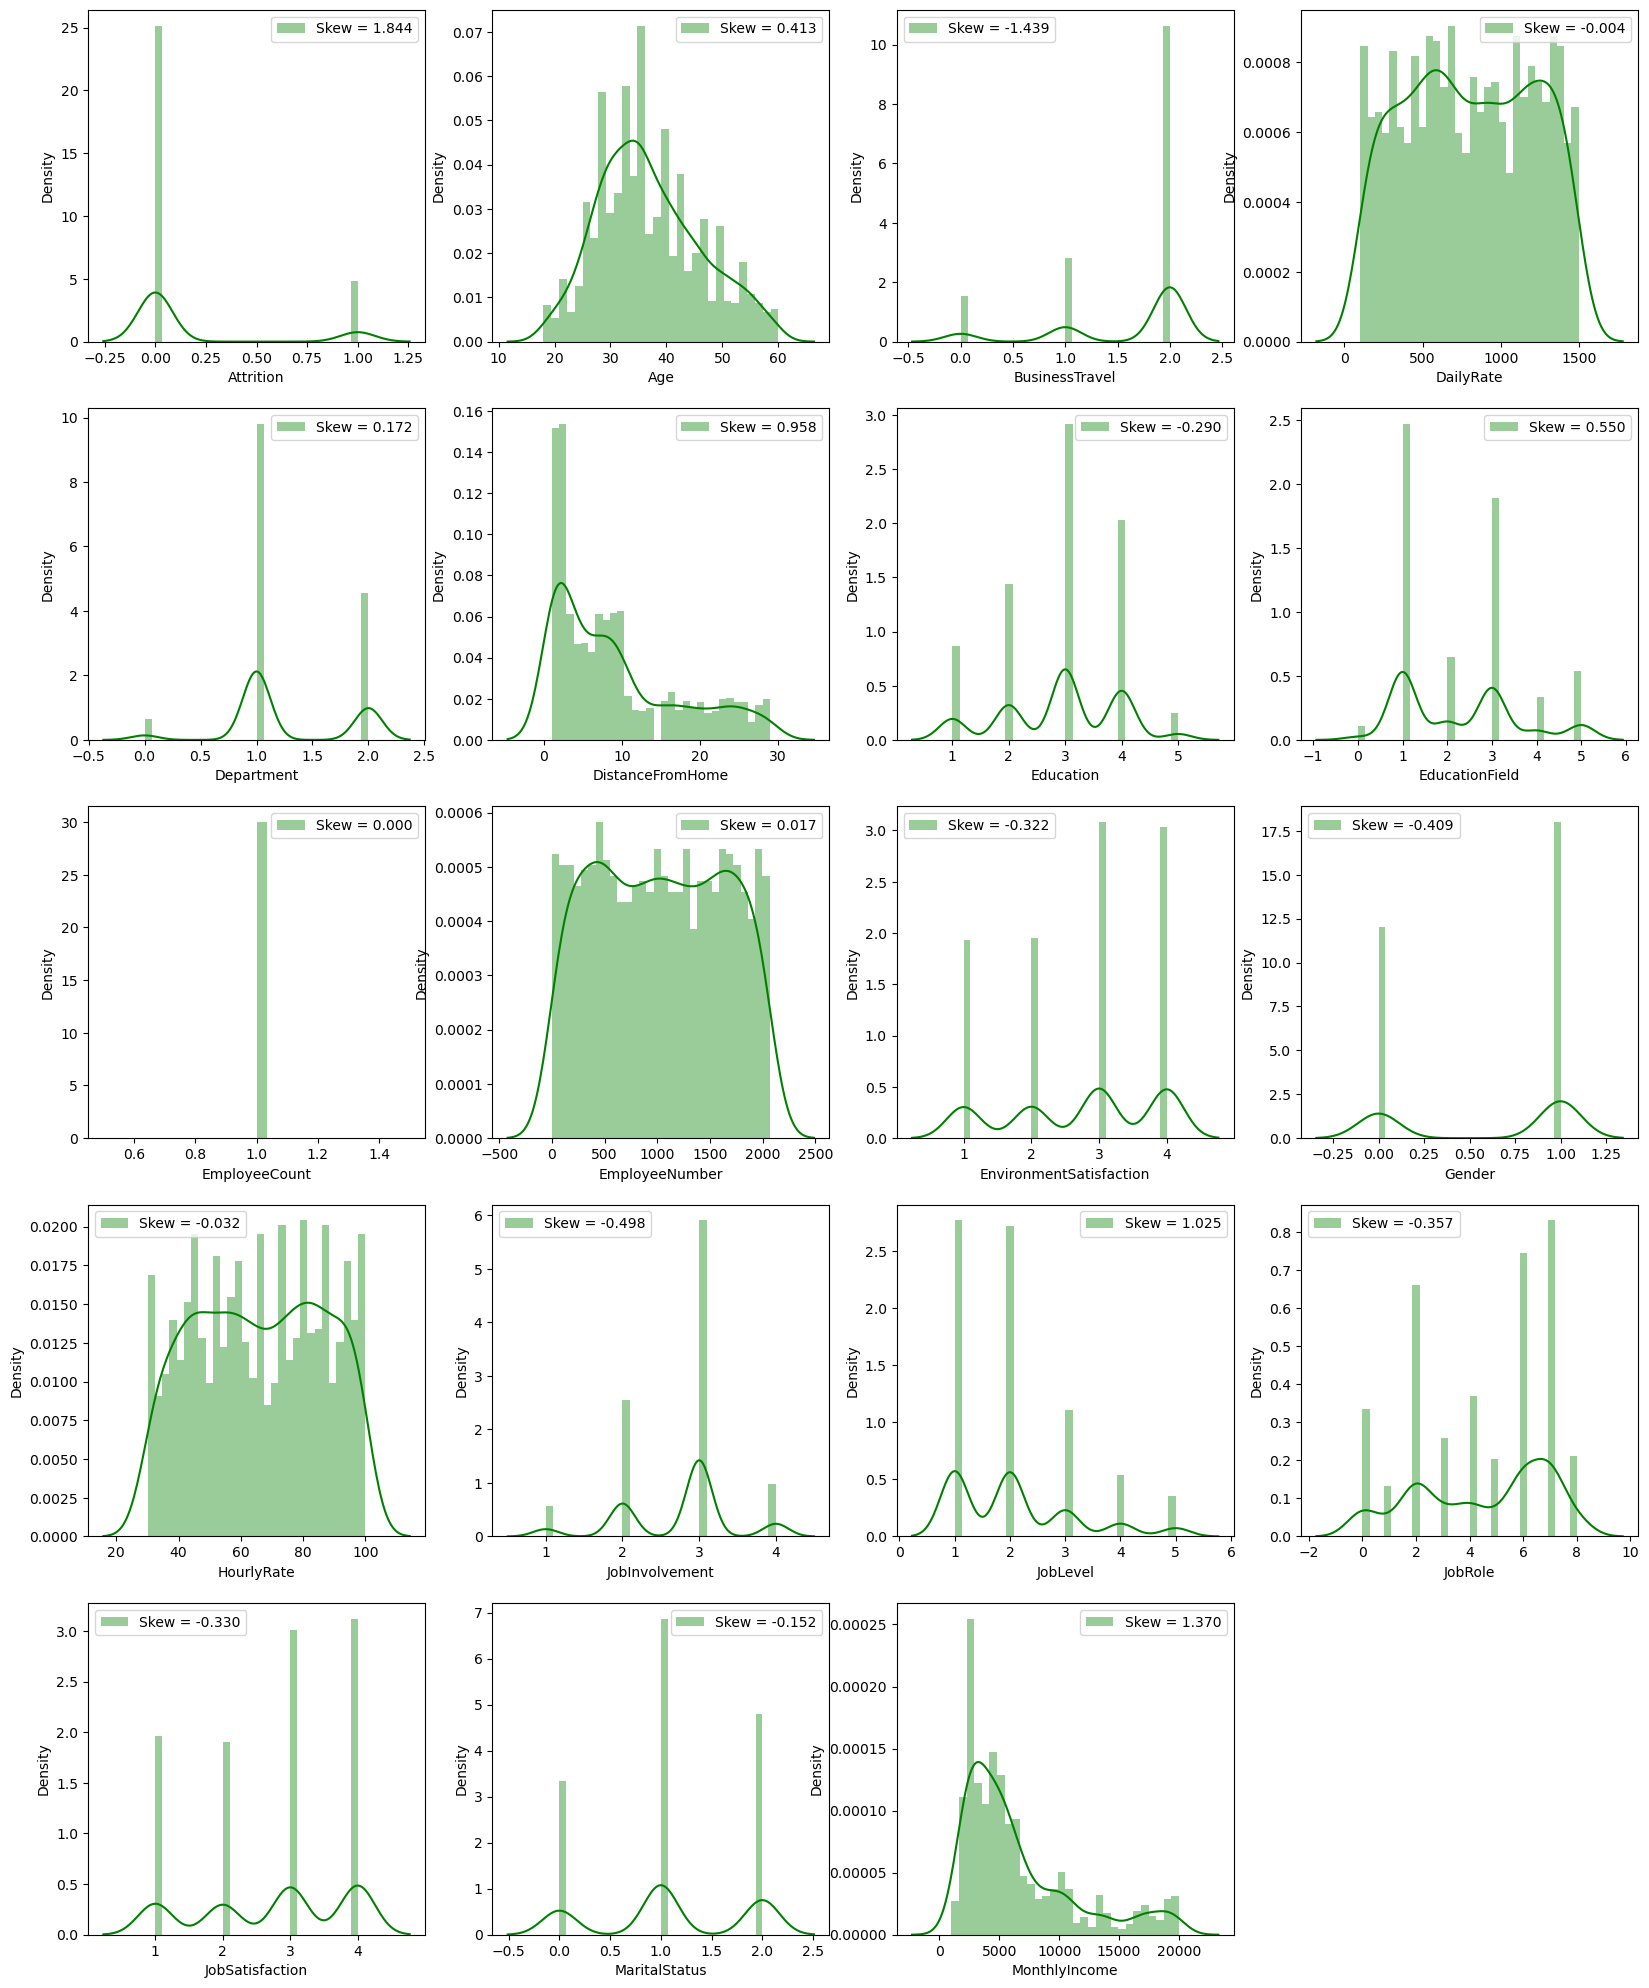

In [13]:
a=[cols for cols in at.columns if at[cols].dtypes != 'O']
plotnumber = 1
plt.figure(figsize=(20,25))
for i in a:
    if plotnumber<= 19:
        ax = plt.subplot(5,4,plotnumber)
        skew = at[i].skew()
        sns.distplot(at[i], kde= True, label='Skew = %.3f' %(skew), bins=30,color='green')
        plt.legend(loc='best')
    plotnumber+=1
plt.show();

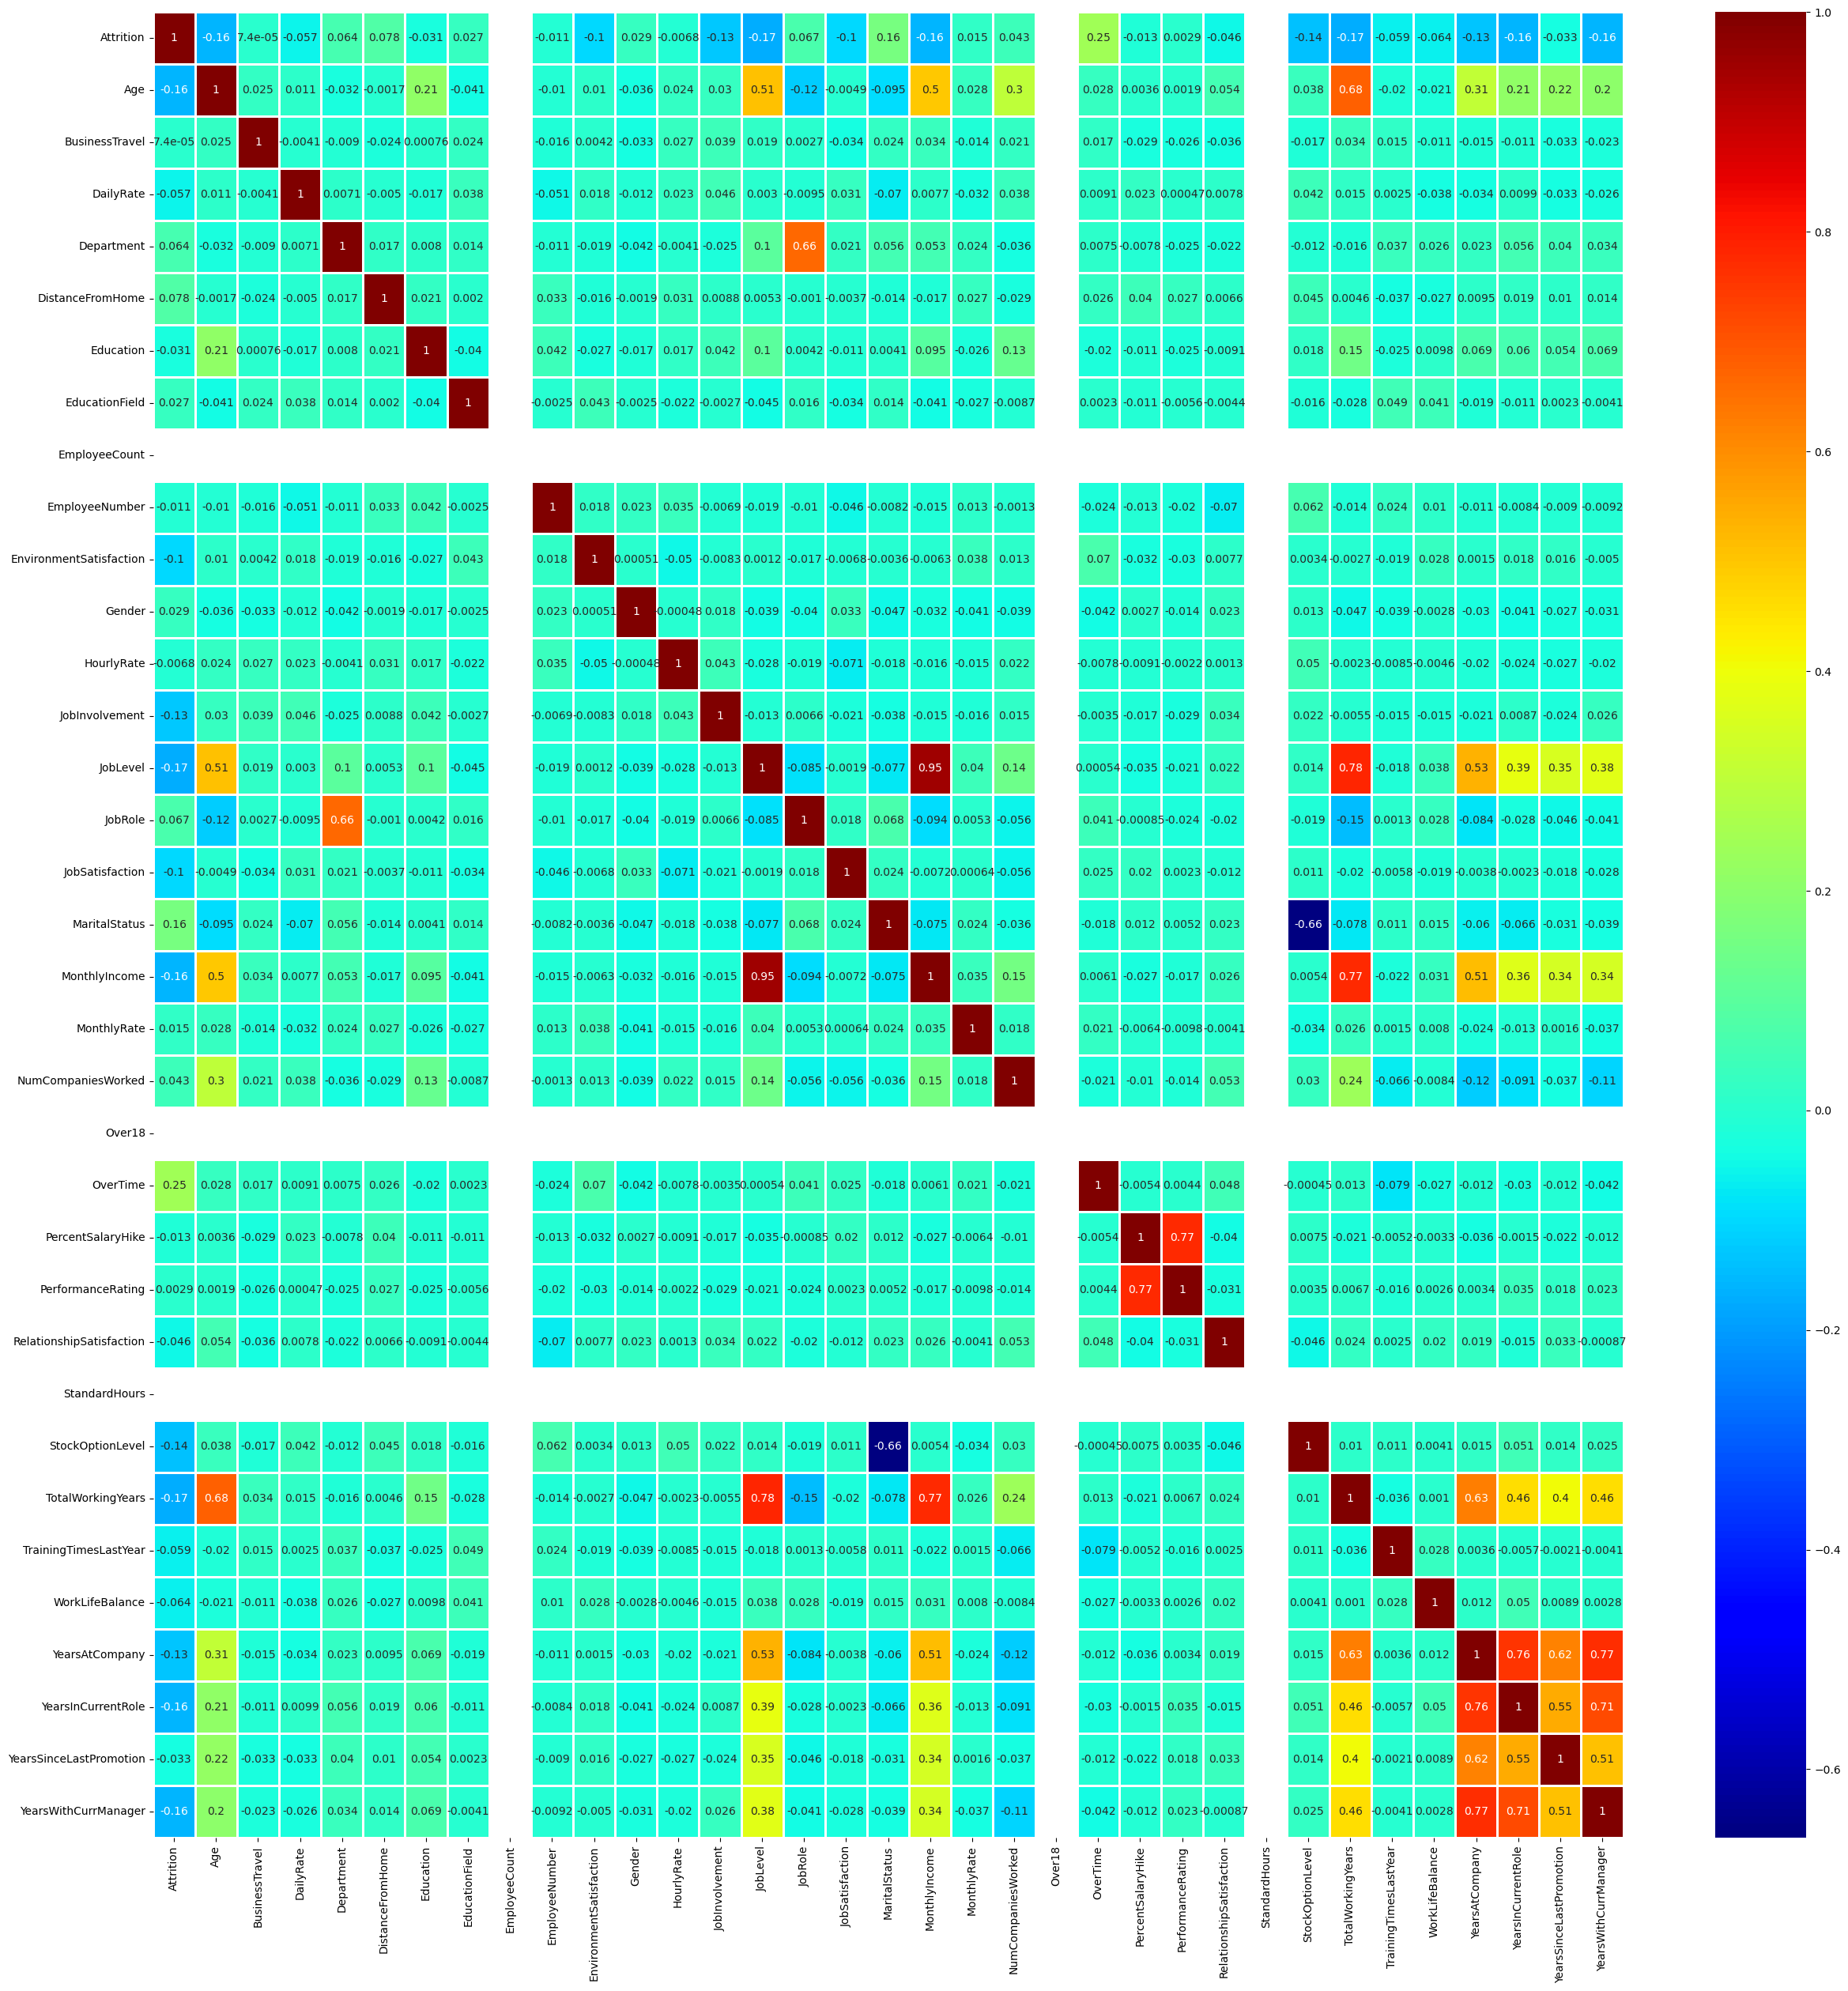

In [14]:
plt.figure(figsize=(30, 30))  
sns.heatmap(data=at.corr(), cmap="jet", annot=True, linewidths=1, linecolor='white')
plt.show()

In [15]:
at = at.drop(["EmployeeCount" , "Over18" , "StandardHours"], axis = 1)

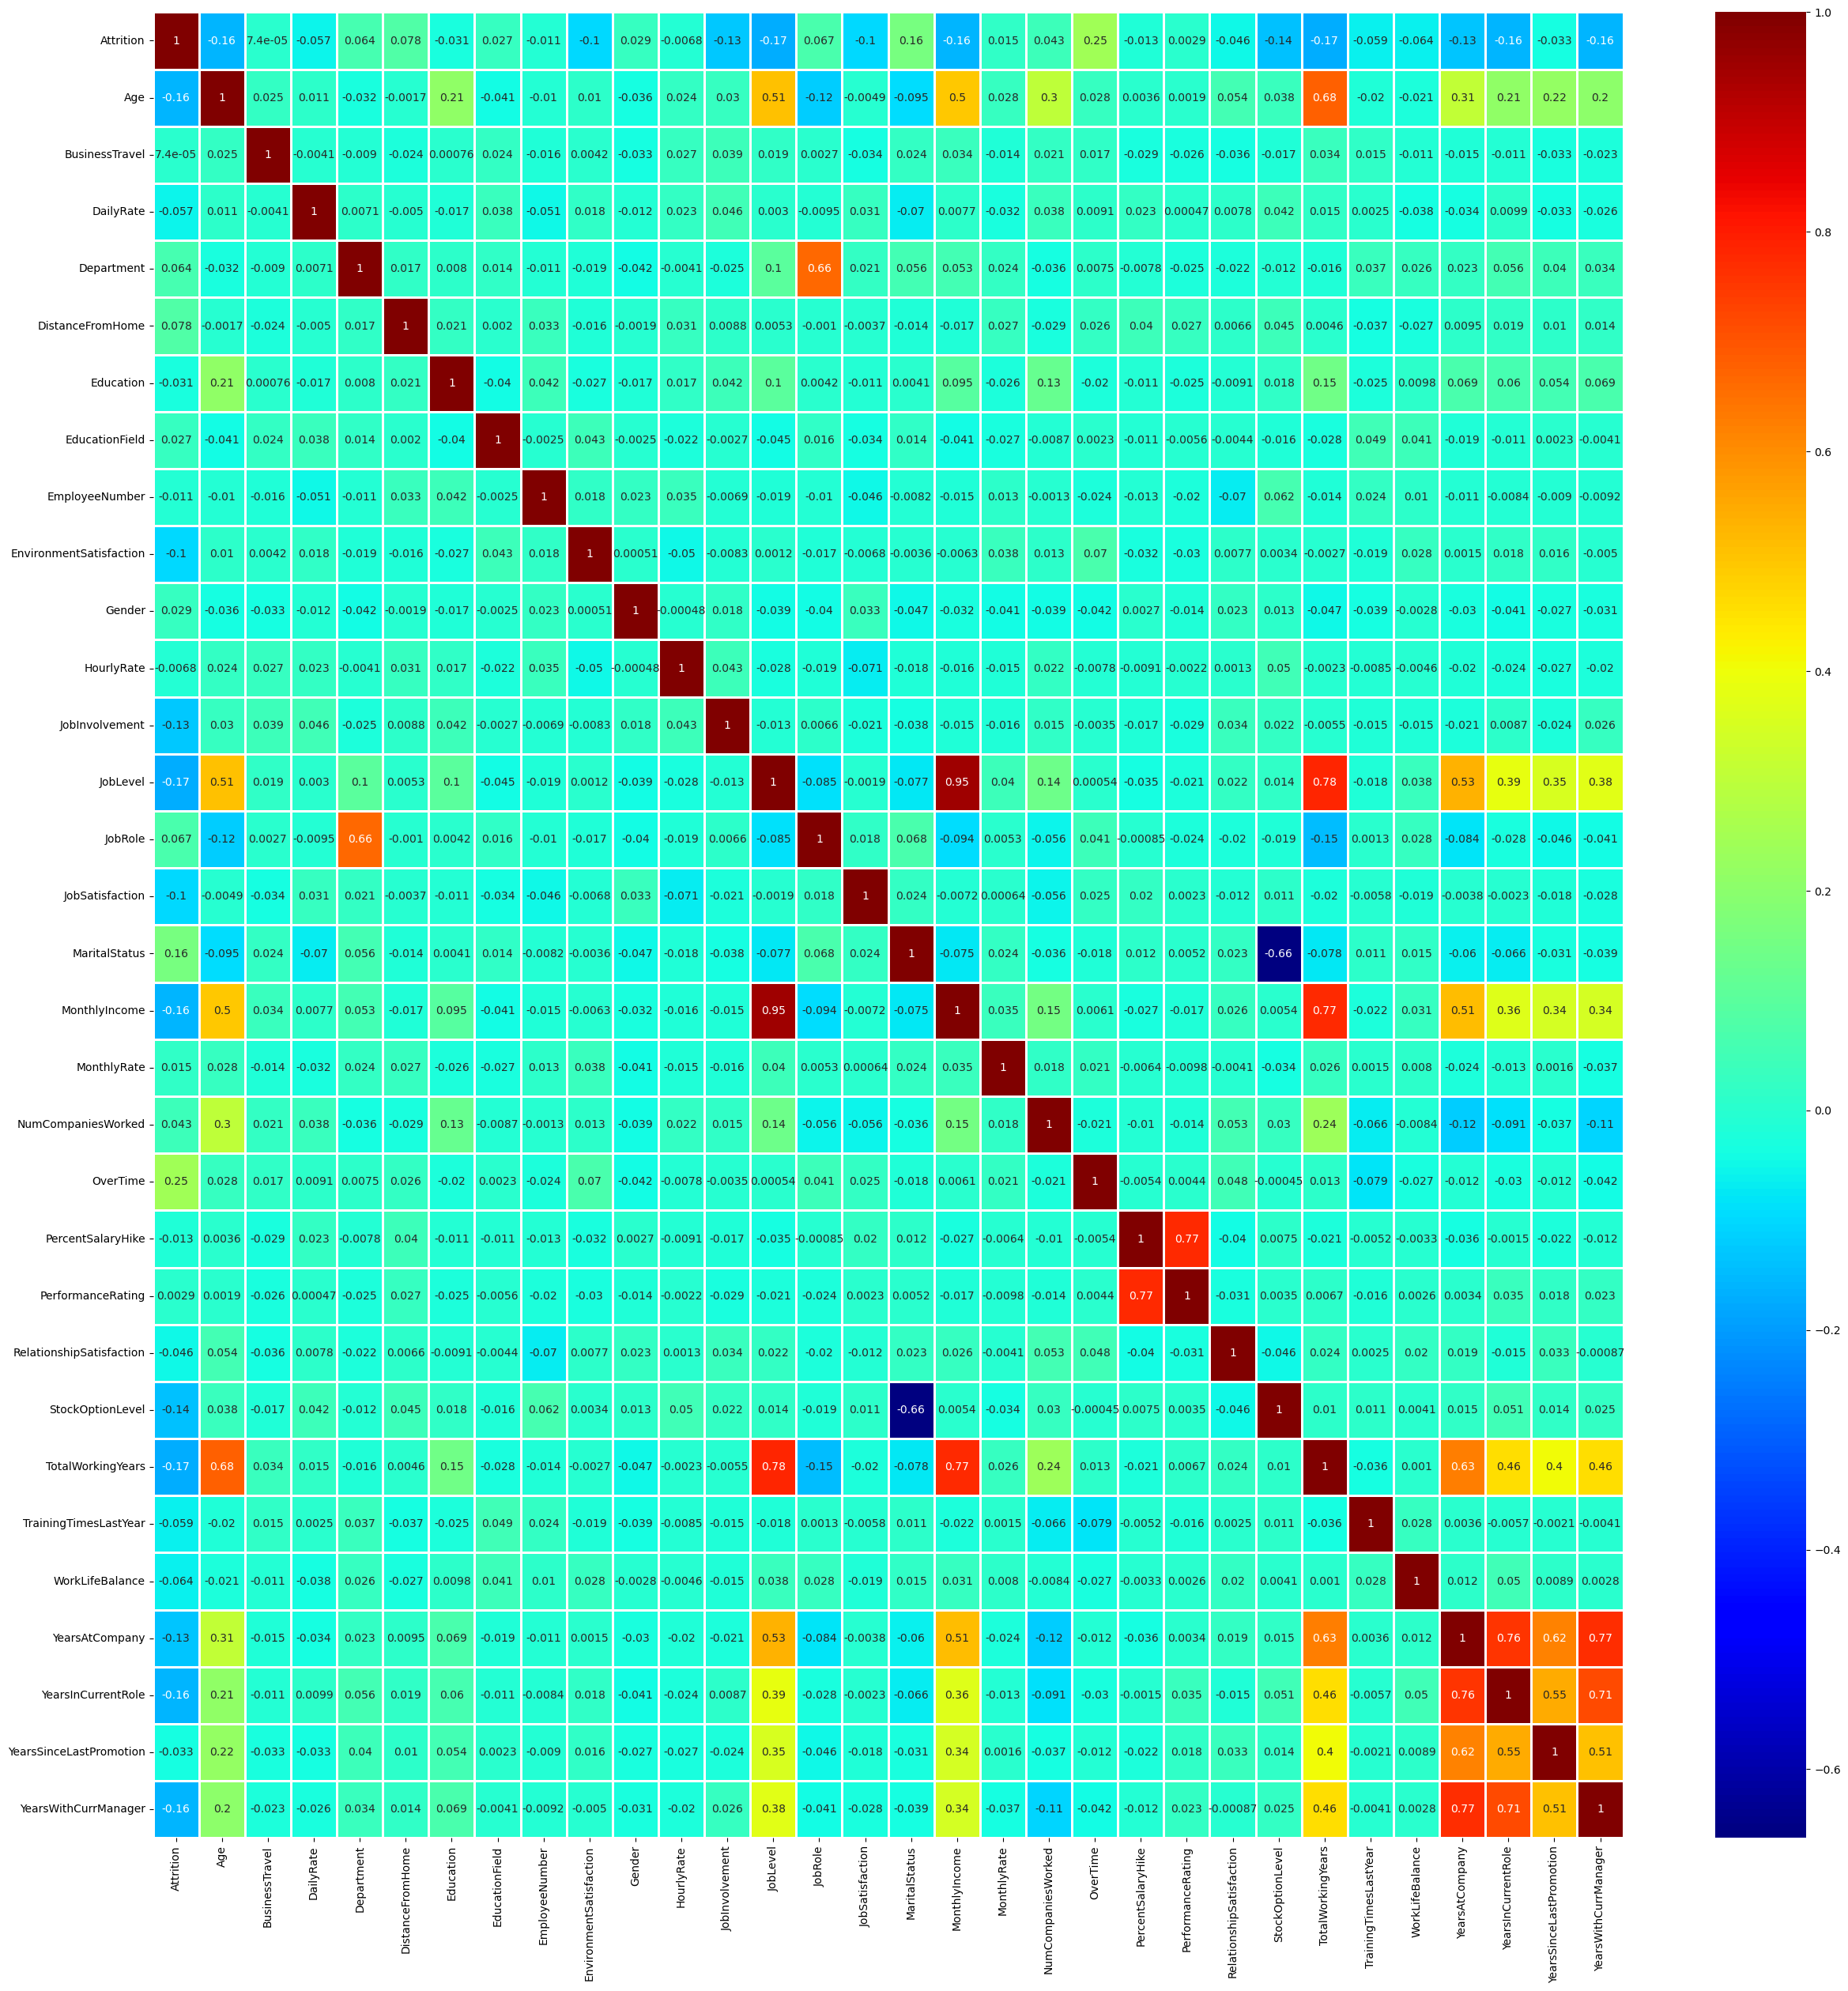

In [16]:
plt.figure(figsize=(30, 30))  
sns.heatmap(data=at.corr(), cmap="jet", annot=True, linewidths=1, linecolor='white')
plt.show()

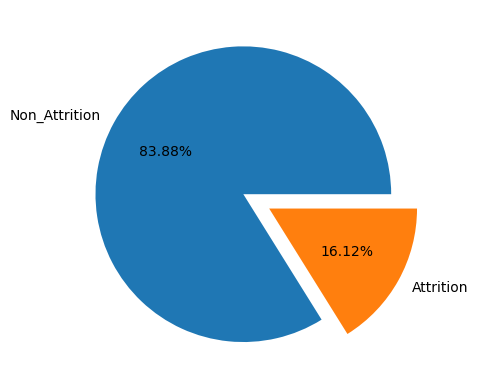

In [17]:
lable = ["Non_Attrition", "Attrition"]
exp = (0, 0.2)  

plt.pie(at['Attrition'].value_counts(), labels=lable, autopct='%1.2f%%', explode=exp)
plt.show()

From this pie chart we can see that the percentage of Attrition rate is comparitively less. **16.1%** is the attrition rate

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
at_train , at_test = train_test_split(at, test_size= 0.2 )

In [20]:
xtrain = at_train.iloc[: , 1:]
ytrain = at_train.iloc[: , 0]

xtest = at_test.iloc[: , 1:]
ytest = at_test.iloc[: , 0]

#### Using the SMOTE for ClassImbalance

In [21]:
import imblearn
from imblearn.over_sampling import SMOTE

In [22]:
sm = SMOTE(sampling_strategy= 1)

In [23]:
train_x , train_y = sm.fit_resample(xtrain , ytrain)

In [24]:
train_y.value_counts()

0    979
1    979
Name: Attrition, dtype: int64

In [25]:
from sklearn.model_selection import GridSearchCV

In [26]:
# search_dict = {"criterion" : ["gini" , "entropy"],
#                "max_depth" : range(3,10)}

In [27]:
# grid = GridSearchCV(dt , param_grid= search_dict)

In [28]:
# grid.fit(train_x , train_y)

In [29]:
# grid.best_estimator_

In [30]:
# search_dictRF = {'criterion':['gini','entropy'],
#                'max_depth': range(3,10),
#               'n_estimators': range(100,300,50)}

In [31]:
# gridRF = GridSearchCV(rf , param_grid= search_dictRF)

In [32]:
# gridRF.fit(train_x , train_y)

In [33]:
# gridRF.best_estimator_

### Logistics Regression

In [34]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [35]:
lr.fit(train_x, train_y)

LogisticRegression()

In [36]:
pred_lr = lr.predict(xtest)

In [37]:
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score, precision_score, f1_score, roc_auc_score, roc_curve

In [38]:
lr_cm = confusion_matrix(ytest, pred_lr)
lr_cm 

array([[152, 102],
       [ 13,  27]], dtype=int64)

In [39]:
recall_lr = recall_score(ytest, pred_lr)
recall_lr

0.675

In [40]:
accuracy_lr = accuracy_score(ytest, pred_lr)
accuracy_lr

0.608843537414966

In [41]:
precision_lr = precision_score(ytest, pred_lr)
precision_lr

0.20930232558139536

## **Decision tree**

In [42]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='entropy', max_depth=9) 

In [43]:
dt.fit(train_x, train_y)

DecisionTreeClassifier(criterion='entropy', max_depth=9)

In [44]:
pdt = dt.predict(xtest)

In [45]:
cmdt = confusion_matrix(ytest, pdt)
cmdt

array([[189,  65],
       [ 28,  12]], dtype=int64)

In [46]:
accuracy_dt = accuracy_score(ytest, pdt)
accuracy_dt

0.6836734693877551

In [47]:
recall_dt = recall_score(ytest, pdt)
recall_dt

0.3

In [48]:
precision_dt = precision_score(ytest, pdt)
precision_dt

0.15584415584415584

## random forest

In [49]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=9, n_estimators=250)

In [50]:
rf.fit(train_x, train_y)

RandomForestClassifier(max_depth=9, n_estimators=250)

In [51]:
prf = rf.predict(xtest)

In [52]:
cmrf = confusion_matrix(ytest, prf)
cmrf

array([[235,  19],
       [ 24,  16]], dtype=int64)

In [53]:
recall_rf = recall_score(ytest, prf)
recall_rf

0.4

In [54]:
accuracy_rf = accuracy_score(ytest, prf)
accuracy_rf

0.8537414965986394

In [55]:
precision_rf = precision_score(ytest, prf)
precision_rf

0.45714285714285713

### Naive Bayes

In [56]:
from sklearn.naive_bayes import BernoulliNB
nb = BernoulliNB()

In [57]:
nb.fit(train_x , train_y)

BernoulliNB()

In [58]:
pred_nb = nb.predict(xtest)
pred_nb

array([1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1], dtype=int64)

In [59]:
confusion_matrix(ytest , pred_nb)

array([[180,  74],
       [ 14,  26]], dtype=int64)

In [60]:
accuracy_NB = accuracy_score(ytest , pred_nb)
accuracy_NB

0.7006802721088435

In [61]:
recall_NB = recall_score(ytest , pred_nb)
recall_NB

0.65

In [62]:
precision_NB = precision_score(ytest , pred_nb)
precision_NB

0.26

### XGB Boost

In [63]:
from xgboost import XGBClassifier
xgb = XGBClassifier()

In [64]:
xgb.fit(train_x , train_y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [65]:
pred_xgb = xgb.predict(xtest)

In [66]:
confusion_matrix(ytest , pred_xgb)

array([[237,  17],
       [ 22,  18]], dtype=int64)

In [67]:
accuracy_XGB = accuracy_score(ytest , pred_xgb)
accuracy_XGB

0.8673469387755102

In [68]:
recall_XGB = recall_score(ytest , pred_xgb)
recall_XGB

0.45

In [69]:
precision_XGB = precision_score(ytest , pred_xgb)
precision_XGB

0.5142857142857142

### Gradient Boosting

In [70]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()

In [71]:
gbc.fit(train_x , train_y)

GradientBoostingClassifier()

In [72]:
pred_gbc = gbc.predict(xtest)

In [73]:
confusion_matrix(ytest , pred_gbc)

array([[229,  25],
       [ 23,  17]], dtype=int64)

In [74]:
accuracy_GB = accuracy_score(ytest , pred_gbc)
accuracy_GB

0.8367346938775511

In [75]:
recall_GB = recall_score(ytest , pred_gbc)
recall_GB

0.425

In [76]:
precision_GB = precision_score(ytest , pred_gbc)
precision_GB

0.40476190476190477

### ADA Boosting

In [77]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier()

In [78]:
abc.fit(train_x , train_y)

AdaBoostClassifier()

In [79]:
pred_abc = abc.predict(xtest)

In [80]:
confusion_matrix(ytest , pred_abc)

array([[225,  29],
       [ 16,  24]], dtype=int64)

In [81]:
accuracy_ADA = accuracy_score(ytest , pred_abc)
accuracy_ADA

0.8469387755102041

In [82]:
recall_ADA = recall_score(ytest , pred_abc)
recall_ADA

0.6

In [83]:
precision_ADA = precision_score(ytest , pred_abc)
precision_ADA

0.4528301886792453

In [84]:
model_performance_accuracy = pd.DataFrame({'Model': ['LogisticRegression', 
                                                      'DecisionTreeClassifier', 
                                                      'RandomForestClassifier',
                                                          'Naive Bayes' , 
                                                      'XGBClassifier',
                                                    'GradientBoostingClassifier',
                                                    'AdaBoostClassifier'],
                                            'Accuracy': [accuracy_lr,
                                                         accuracy_dt,
                                                         accuracy_rf,
                                                         accuracy_NB ,
                                                         accuracy_XGB,
                                                        accuracy_GB,
                                                        accuracy_ADA],
                                          'Recall' : [recall_lr,
                                                     recall_dt,
                                                     recall_rf,
                                                      recall_NB,
                                                     recall_XGB,
                                                     recall_GB ,
                                                     recall_ADA],
                                          'Precision' : [precision_lr,
                                                        precision_dt,
                                                        precision_rf,
                                                         precision_NB,
                                                        precision_XGB,
                                                        precision_GB, 
                                                        precision_ADA]})

In [85]:
import tabulate as tb
print(tb.tabulate(model_performance_accuracy, headers = 'keys', tablefmt = 'fancy_grid'))

╒════╤════════════════════════════╤════════════╤══════════╤═════════════╕
│    │ Model                      │   Accuracy │   Recall │   Precision │
╞════╪════════════════════════════╪════════════╪══════════╪═════════════╡
│  0 │ LogisticRegression         │   0.608844 │    0.675 │    0.209302 │
├────┼────────────────────────────┼────────────┼──────────┼─────────────┤
│  1 │ DecisionTreeClassifier     │   0.683673 │    0.3   │    0.155844 │
├────┼────────────────────────────┼────────────┼──────────┼─────────────┤
│  2 │ RandomForestClassifier     │   0.853741 │    0.4   │    0.457143 │
├────┼────────────────────────────┼────────────┼──────────┼─────────────┤
│  3 │ Naive Bayes                │   0.70068  │    0.65  │    0.26     │
├────┼────────────────────────────┼────────────┼──────────┼─────────────┤
│  4 │ XGBClassifier              │   0.867347 │    0.45  │    0.514286 │
├────┼────────────────────────────┼────────────┼──────────┼─────────────┤
│  5 │ GradientBoostingClassifier │   